In [208]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [209]:
folder_path = r'C:\Users\ÇağrıArslantürk\Desktop\CS210\dataframes' 

json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

combined_df = pd.DataFrame()

dfs = []

# Iterate through each JSON file and append it to the list
for json_file in json_files:
    file_path = os.path.join(folder_path, json_file)
    df = pd.read_json(file_path)
    dfs.append(df)

# Concatenate the list of dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined dataframe
display(combined_df)

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2018-01-19T06:01:35Z,cagri.arslanturk,"iOS 11.1.1 (iPhone9,4)",15744,TR,None,None,Gasoline,Halsey,BADLANDS,...,None,None,None,clickrow,None,False,NaN,0.0,1516341678885,False
1,2018-01-19T06:01:44Z,cagri.arslanturk,"iOS 11.1.1 (iPhone9,4)",7637,TR,None,None,King Charles,YUNGBLUD,King Charles,...,None,None,None,clickrow,None,False,NaN,0.0,1516341695084,False
2,2018-01-19T06:01:51Z,cagri.arslanturk,"iOS 11.1.1 (iPhone9,4)",7402,TR,None,None,Hatef--k,The Bravery,Stir The Blood,...,None,None,None,clickrow,None,False,NaN,0.0,1516341703581,False
3,2018-01-19T06:01:55Z,cagri.arslanturk,"iOS 11.1.1 (iPhone9,4)",3840,TR,None,None,Running With The Wolves,AURORA,Running With The Wolves,...,None,None,None,clickrow,None,False,NaN,0.0,1516341711183,False
4,2018-01-19T06:01:59Z,cagri.arslanturk,"iOS 11.1.1 (iPhone9,4)",3135,TR,None,None,"F**kin' Problems (feat. Drake, 2 Chainz & Kend...",A$AP Rocky,LONG.LIVE.A$AP (Deluxe Version),...,None,None,None,clickrow,None,False,NaN,0.0,1516341715209,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49082,2023-08-22T21:42:30Z,cagri.arslanturk,ios,0,TR,159.20.68.5,unknown,None,None,None,...,Gereksiz olanlardan kaçınmak,stoikyaşam,spotify:episode:7lljDbET9fd5oS99FZtVzR,unknown,endplay,False,True,NaN,0,False
49083,2023-10-13T06:32:05Z,cagri.arslanturk,ios,3179,TR,159.20.68.5,unknown,Dumb,Nirvana,In Utero,...,None,None,None,unknown,endplay,False,True,NaN,0,False
49084,2023-10-13T06:32:07Z,cagri.arslanturk,ios,982,TR,159.20.68.5,unknown,Dream On,Aerosmith,Aerosmith,...,None,None,None,unknown,endplay,False,True,NaN,0,False
49085,2023-10-13T06:32:08Z,cagri.arslanturk,ios,649,TR,159.20.68.5,unknown,Dumb,Nirvana,In Utero,...,None,None,None,unknown,endplay,False,True,NaN,0,False


In [210]:
selected_features = [
    'ts',
    'ms_played',
    'master_metadata_track_name',
    'master_metadata_album_artist_name',
    'master_metadata_album_album_name',
    'spotify_track_uri',
    'episode_name',
    'episode_show_name',
    'spotify_episode_uri',
    'shuffle',
    'skipped',
    'offline',
    'offline_timestamp'
]
combined_df = combined_df[selected_features]
display(combined_df)

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,shuffle,skipped,offline,offline_timestamp
0,2018-01-19T06:01:35Z,15744,Gasoline,Halsey,BADLANDS,spotify:track:3zE7ATRpfliDluoedEUSQr,None,None,None,False,NaN,0.0,1516341678885
1,2018-01-19T06:01:44Z,7637,King Charles,YUNGBLUD,King Charles,spotify:track:2WtsgFYRhvZtWQO7H1aKJM,None,None,None,False,NaN,0.0,1516341695084
2,2018-01-19T06:01:51Z,7402,Hatef--k,The Bravery,Stir The Blood,spotify:track:73fQund5wDUazb5ODG9dTk,None,None,None,False,NaN,0.0,1516341703581
3,2018-01-19T06:01:55Z,3840,Running With The Wolves,AURORA,Running With The Wolves,spotify:track:3mYKQcFU6USoJpzpkwYdQe,None,None,None,False,NaN,0.0,1516341711183
4,2018-01-19T06:01:59Z,3135,"F**kin' Problems (feat. Drake, 2 Chainz & Kend...",A$AP Rocky,LONG.LIVE.A$AP (Deluxe Version),spotify:track:4XoP1AkbOurU9CeZ2rMEz2,None,None,None,False,NaN,0.0,1516341715209
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49082,2023-08-22T21:42:30Z,0,None,None,None,None,Gereksiz olanlardan kaçınmak,stoikyaşam,spotify:episode:7lljDbET9fd5oS99FZtVzR,False,True,NaN,0
49083,2023-10-13T06:32:05Z,3179,Dumb,Nirvana,In Utero,spotify:track:5gRcv46AMTrosmTOqrOV3Q,None,None,None,False,True,NaN,0
49084,2023-10-13T06:32:07Z,982,Dream On,Aerosmith,Aerosmith,spotify:track:1xsYj84j7hUDDnTTerGWlH,None,None,None,False,True,NaN,0
49085,2023-10-13T06:32:08Z,649,Dumb,Nirvana,In Utero,spotify:track:5gRcv46AMTrosmTOqrOV3Q,None,None,None,False,True,NaN,0


In [211]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49087 entries, 0 to 49086
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ts                                 49087 non-null  object
 1   ms_played                          49087 non-null  int64 
 2   master_metadata_track_name         48066 non-null  object
 3   master_metadata_album_artist_name  48066 non-null  object
 4   master_metadata_album_album_name   48066 non-null  object
 5   spotify_track_uri                  48066 non-null  object
 6   episode_name                       1014 non-null   object
 7   episode_show_name                  1014 non-null   object
 8   spotify_episode_uri                1014 non-null   object
 9   shuffle                            49087 non-null  bool  
 10  skipped                            13756 non-null  object
 11  offline                            48965 non-null  object
 12  offl

In [212]:
csv_files = [r"C:\Users\ÇağrıArslantürk\Desktop\CS210\sad_2.csv", r"C:\Users\ÇağrıArslantürk\Desktop\CS210\mix.csv", r"C:\Users\ÇağrıArslantürk\Desktop\CS210\metal.csv", r"C:\Users\ÇağrıArslantürk\Desktop\CS210\rap.csv", r"C:\Users\ÇağrıArslantürk\Desktop\CS210\mangal.csv", r"C:\Users\ÇağrıArslantürk\Desktop\CS210\anadolu.csv"]

# Create a dictionary to store DataFrames
data_frames = {}

# Read each CSV file and store the DataFrame in the dictionary
for file_path2 in csv_files:
    file_name2 = file_path2.split('\\')[-1].split('.')[0]  # Extracting the file name without extension
    
    try:
        data_frames[file_name2] = pd.read_csv(file_path2)
    except pd.errors.ParserError as e:
        print(f"Error reading {file_name2}: {e}")

In [213]:
for file_name2, df in data_frames.items():
    print(f"DataFrame for {file_name2}:")
    display(df.head())  # Print the first few rows of each DataFrame
    print("\n" + "="*50 + "\n") 

DataFrame for sad_2:


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview,Unnamed: 26
0,1,Some Feeling,Mild Orange,0,129,"dunedin indie, nz indie","Folk/Acoustic, Rock",Foreplay,4/18/2018,3:17,...,-8,A Minor,4,3/24/2021,1fNlnYQkud28rZl1OnWXGY,Mild Orange,8A,NaN,https://i.scdn.co/image/ab67616d000048512698e3...,NaN
1,2,Lioness,Songs: Ohia,0,80,"alternative country, chamber pop, indie rock, ...","Country, Pop, Rock, Folk/Acoustic",The Lioness,1/17/2000,6:36,...,-12,G#/A♭ Minor,4,3/24/2021,60DGbYeckYGaNA7ZBt5j0F,Secretly Canadian,1A,NaN,https://i.scdn.co/image/ab67616d000048517b5518...,NaN
2,3,Keep It Healthy,Warpaint,0,134,"alternative dance, art pop, chamber pop, dance...","Rock, Pop, Electronic",Warpaint,2013-00-00,4:01,...,-9,G Major,4,3/24/2021,7h7FjEmIgsFdl9zbUfySnZ,Rough Trade,9B,NaN,https://i.scdn.co/image/ab67616d00004851bba60f...,NaN
3,4,Funeral Pyre,Phantogram,36,168,"indietronica, metropopolis, neo-synthpop","Pop, Electronic",Three,10/7/2016,4:05,...,-6,C Major,4,3/24/2021,79uGuP3o5HO5ZlXTWbq0LW,Universal Records,8B,NaN,https://i.scdn.co/image/ab67616d00004851d99618...,NaN
4,5,Ghostride,Crumb,0,87,neo-psychedelic,Folk/Acoustic,Jinx,6/14/2019,2:06,...,-9,D Major,4,3/24/2021,476QHG5G8xxNI9VHTBFfjp,Crumb Records,10B,NaN,https://i.scdn.co/image/ab67616d000048519d45a1...,NaN




DataFrame for mix:


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview
0,1,Upside Down,Jack Johnson,76,102,neo mellow,Folk/Acoustic,Upside Down,2006-02-24,03:29,...,10,-8,E Major,4,2021-07-05,0aJrYfARfCKzv6gXjhs4SZ,Brushfire Records/Universal,12B,NaN,https://i.scdn.co/image/ab67616d00004851f401bb...
1,2,Pretty Fly (For A White Guy),The Offspring,78,143,"alternative metal, permanent wave, post-grunge...","Metal, Rock, Pop",Americana,1998-11-16,03:08,...,0,-4,B Minor,4,2021-07-05,3SFXsFpeGmBTtQvKiwYMDA,Round Hill Music (Offspring),10A,NaN,https://i.scdn.co/image/ab67616d00004851cbd2ee...
2,3,Island In The Sun,Weezer,82,115,"alternative rock, modern power pop, modern roc...","Rock, Pop",Weezer,2001-05-15,03:20,...,10,-6,E Minor,4,2021-07-05,2MLHyLy5z5l5YRp7momlgw,Geffen,9A,NaN,https://i.scdn.co/image/ab67616d000048511e0dc5...
3,4,Don't Threaten Me with a Good Time,Panic! At The Disco,70,184,"modern rock, pop","Rock, Pop",Death of a Bachelor,2016-01-15,03:33,...,10,-4,C♯/D♭ Minor,4,2021-07-05,2fh3bZ8jZhMxOcfESE9nQY,Decaydance/Fueled By Ramen,12A,https://p.scdn.co/mp3-preview/70f3389c12b78739...,https://i.scdn.co/image/ab67616d0000485123152d...
4,5,I Write Sins Not Tragedies,Panic! At The Disco,74,170,"modern rock, pop","Rock, Pop",A Fever You Can't Sweat Out,2005-09-27,03:05,...,10,-4,A Minor,4,2021-07-05,5cY8y2XgOfkAh4kSWLFKkz,Fueled By Ramen/ADA,8A,https://p.scdn.co/mp3-preview/6c56a9bd72eeab84...,https://i.scdn.co/image/ab67616d00004851e8b923...




DataFrame for metal:


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview
0,1,Tornado Of Souls - 2004 Remix,Megadeth,68,98,"alternative metal, hard rock, melodic thrash, ...","Metal, Rock",Rust In Peace (2004 Remix / Expanded Edition),1990-10-04,05:19,...,10,-4,G Major,4,2021-03-10,4E5xVW505akJX0wcKj8Mpd,Capitol Records,9B,NaN,https://i.scdn.co/image/ab67616d00004851be9fa5...
1,2,Symphony Of Destruction,Megadeth,71,140,"alternative metal, hard rock, melodic thrash, ...","Metal, Rock",Countdown To Extinction (Expanded Edition - Re...,1992-07-14,04:06,...,0,-5,E Minor,4,2021-03-10,51TG9W3y9qyO8BY5RXKgnZ,Capitol Records,9A,NaN,https://i.scdn.co/image/ab67616d000048517b178f...
2,3,Seasons In The Abyss,Slayer,61,152,"alternative metal, death metal, groove metal, ...","Metal, Rock",Seasons In The Abyss,1990-01-01,06:37,...,0,-4,F Minor,4,2022-03-08,3Ky8IzV8IVSwijtaTWB2SK,American Recordings Catalog P&D,4A,NaN,https://i.scdn.co/image/ab67616d00004851c0c12d...
3,4,The Trooper - 2015 Remaster,Iron Maiden,76,160,"alternative metal, hard rock, metal, nwobhm, rock","Metal, Rock",Piece of Mind (2015 Remaster),1983-00-00,04:12,...,30,-5,E Minor,4,2022-03-08,4OROzZUy6gOWN4UGQVaZMF,Parlophone UK,9A,https://p.scdn.co/mp3-preview/44ed0e1d3b2183b4...,https://i.scdn.co/image/ab67616d000048512277d1...
4,5,Got The Time,Anthrax,62,128,"alternative metal, glam metal, groove metal, h...","Metal, Rock",Persistence Of Time (30th Anniversary Remaster),1990-08-21,02:44,...,0,-5,A#/B♭ Minor,4,2022-03-08,3cFnb3Rg9a7Gzqxc5QQ9YZ,Island Records,3A,NaN,https://i.scdn.co/image/ab67616d0000485147c265...




DataFrame for rap:


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview
0,1,Big Poppa - 2005 Remaster,The Notorious B.I.G.,81,84,"east coast hip hop, gangster rap, hardcore hip...",Hip Hop,Ready to Die (The Remaster),1994-09-13,04:12,...,10,-7,A Minor,4,2021-07-05,2g8HN35AnVGIk7B8yMucww,Bad Boy Records,8A,https://p.scdn.co/mp3-preview/7674508c1c15cb2a...,https://i.scdn.co/image/ab67616d00004851db0995...
1,2,Ruff Ryders' Anthem,DMX,73,91,"detroit hip hop, east coast hip hop, gangster ...",Hip Hop,It's Dark And Hell Is Hot,1998-05-01,03:34,...,20,-8,A#/B♭ Minor,4,2021-07-05,1BKT2I9x4RGKaKqW4up34s,Def Jam Recordings,3A,NaN,https://i.scdn.co/image/ab67616d0000485111658b...
2,3,X Gon' Give It To Ya,DMX,74,95,"detroit hip hop, east coast hip hop, gangster ...",Hip Hop,The Definition Of X: Pick Of The Litter,2007-06-12,03:37,...,0,-3,A#/B♭ Minor,4,2021-07-05,1zzxoZVylsna2BQB65Ppcb,RAL,3A,NaN,https://i.scdn.co/image/ab67616d0000485101a6fa...
3,4,"Triumph (feat. Ol' Dirty Bastard, Inspectah De...","Wu-Tang Clan,Ol' Dirty Bastard,Inspectah Deck,...",65,91,"east coast hip hop, gangster rap, hardcore hip...",Hip Hop,Wu-Tang Forever,1997-06-03,05:38,...,30,-7,D Major,4,2021-07-05,3glqlA5qY3bbo8UaUDGPnw,LOUD Records,10B,https://p.scdn.co/mp3-preview/5a6e8bec4846a5a6...,https://i.scdn.co/image/ab67616d0000485177e8e2...
4,5,"Bring Da Ruckus (feat. RZA, Ghostface Killah, ...","Wu-Tang Clan,RZA,Ghostface Killah,Raekwon,Insp...",63,88,"east coast hip hop, gangster rap, hardcore hip...",Hip Hop,Enter The Wu-Tang (36 Chambers) [Expanded Edit...,1993-11-09,04:11,...,30,-9,B Major,4,2021-07-05,1v5cgIyffYtfEx0swttdoE,RCA Records Label,1B,https://p.scdn.co/mp3-preview/cd9b9cb44ce3d780...,https://i.scdn.co/image/ab67616d000048515901aa...




DataFrame for mangal:


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview
0,1,Beirut,Ibrahim Maalouf,46,64,"arabic jazz, french jazz, jazz trumpet",Jazz,Diagnostic (Version remasterisée),2011-10-26,10:39,...,10,-11,G Minor,5,2021-07-06,0Sy2FEb4SM0EEZZPCZTolt,Mi'ster,6A,https://p.scdn.co/mp3-preview/7d8574c8337cd60e...,https://i.scdn.co/image/ab67616d00004851388b1d...
1,2,Eternity And A Day: 2. By The Sea,Eleni Karaindrou,60,162,"greek contemporary classical, soundtrack","Classical, Easy listening",Eternity And A Day,1998-12-01,01:47,...,10,-27,A#/B♭ Minor,4,2021-07-06,595G0No6FI82sWWsbsQEoX,ECM New Series,3A,NaN,https://i.scdn.co/image/ab67616d00004851f2cb27...
2,3,Gnossienne No.1,Erkan Oğur,0,72,"ney, turkish folk, turkish jazz","Folk/Acoustic, Jazz",Dönmez Yol,2012-03-26,04:39,...,10,-17,F Minor,4,2021-07-06,22moT6T8yDX2GVT7iOScH8,KALAN SES GÖRÜNTÜ,4A,NaN,https://i.scdn.co/image/ab67616d00004851eed361...
3,4,Goodbye Llano,Lilium,0,91,gothic americana,Country,Transmissions of All the Goodbyes,2000-10-27,04:59,...,0,-19,G Minor,4,2021-07-06,2PtD6gxjjpyn4KybOCwYiJ,Glitterhouse Records,6A,NaN,https://i.scdn.co/image/ab67616d00004851755b65...
4,5,Swell,Lilium,0,73,gothic americana,Country,Transmissions of All the Goodbyes,2000-10-27,03:20,...,10,-25,E Minor,4,2021-07-06,27rPE9ZpTrQ3IhulJgwXUL,Glitterhouse Records,9A,NaN,https://i.scdn.co/image/ab67616d00004851755b65...




DataFrame for anadolu:


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot,Spotify Track Img,Song Preview
0,1,Deniz Üstü Köpürür,"Ünol Büyükgönenç,Kardaslar",34,114,"turkish psych, anadolu rock","Rock, Pop",Uzelli Psychedelic Anadolu,2017-03-17,06:19,...,0,-11,F Minor,4,2021-03-10,1D2PnLTsRJKQwO1cNTcUNS,Uzelli Kaset San.,4A,https://p.scdn.co/mp3-preview/f5c8c7df0cc16e04...,https://i.scdn.co/image/ab67616d000048512a104d...
1,2,Olmalı mı Olmamalı mı,Bülent Ortaçgil,41,130,"turkish jazz, turkish rock, turkish singer-son...","Jazz, Rock, Pop",Benimle Oynar Mısın,1993-04-15,02:11,...,10,-15,F#/G♭ Minor,4,2021-03-10,0pnC8KYOumEqzYDALFQNAL,BEĞENİ MÜZİK YAPIM,11A,https://p.scdn.co/mp3-preview/ad348f8861b7c270...,https://i.scdn.co/image/ab67616d000048511e2894...
2,3,Adimiz Miskindir Bizim,Mazhar Ve Fuat,45,107,"anadolu rock, turkish psych","Rock, Pop",Christophe Lemaire And Now-Again Present: Wher...,2011-10-18,05:25,...,10,-5,C♯/D♭ Major,4,2021-03-10,4bxSoFQl2ExbgPLSj24UDH,Now Again Records,3B,https://p.scdn.co/mp3-preview/a0ead0bae40fe60e...,https://i.scdn.co/image/ab67616d00004851b6a2f8...
3,4,Gurbet,Özdemir Erdoğan,66,91,anadolu rock,Rock,Yorumcu,1989-00-00,03:26,...,10,-15,F Minor,4,2021-03-10,2cJhhpxflevAtPFku1kxID,Özdemir Erdoğan Müzik,4A,https://p.scdn.co/mp3-preview/7bb8e7a68536ed8c...,https://i.scdn.co/image/ab67616d00004851f0e41b...
4,5,İlahi Morluk,Erkin Koray,16,102,anadolu rock,Rock,Dünden Esintilerle,1993-05-27,03:31,...,50,-12,D Major,4,2021-03-10,79YubTuxofVL5fl0QPFyKs,İSTANBUL PLAK LTD.,10B,https://p.scdn.co/mp3-preview/53cae9e444eae7d6...,https://i.scdn.co/image/ab67616d00004851ed08f5...


In [214]:
for file_name2, df in data_frames.items():
    print(f"Info for DataFrame {file_name2}:")
    print(df.info())
    print("\n" + "="*50 + "\n")

Info for DataFrame sad_2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   #                  56 non-null     int64 
 1   Song               56 non-null     object
 2   Artist             56 non-null     object
 3   Popularity         56 non-null     int64 
 4   BPM                56 non-null     int64 
 5   Genres             53 non-null     object
 6   Parent Genres      53 non-null     object
 7   Album              56 non-null     object
 8   Album Date         56 non-null     object
 9   Time               56 non-null     object
 10  Dance              56 non-null     object
 11  Energy             56 non-null     int64 
 12  Acoustic           56 non-null     int64 
 13  Instrumental       56 non-null     int64 
 14  Happy              56 non-null     int64 
 15  Speech             56 non-null     int64 
 16  Live               5

In [215]:
combined_df['ts'] = pd.to_datetime(combined_df['ts'])

# Create a dictionary to store separate DataFrames for each year
yearly_data_frames = {}

# Iterate through unique years in 'ts'
for year in combined_df['ts'].dt.year.unique():
    year_key = f"year_{year}"
    yearly_data_frames[year_key] = combined_df[combined_df['ts'].dt.year == year].copy()

In [216]:
total_ms_played = {}

# Iterate through each DataFrame in data_frames
for file_name_3, df in data_frames.items():
    total_ms_played[file_name_3] = 0  # Initialize total ms_played for the current DataFrame
    
    # Create a dictionary to store total ms_played for each year
    total_ms_per_year = {}
    
    # Iterate through each year in yearly_data_frames
    for year_key, yearly_df in yearly_data_frames.items():
        # Merge based on the condition: 'song' == 'master_metadata_track_name' and 'artist' == 'master_metadata_album_artist_name'
        merged_df = pd.merge(df, yearly_df, left_on=['Song', 'Artist'], right_on=['master_metadata_track_name', 'master_metadata_album_artist_name'], how='inner')
        
        # Check if there are matching records
        if not merged_df.empty:
            # Handle potential repetition of songs with different ms_played
            merged_df['ms_played'] = merged_df.groupby(['Song', 'Artist'])['ms_played'].transform('sum')
            
            # Accumulate the total ms_played for the current DataFrame
            total_ms_played[file_name_3] += merged_df['ms_played'].sum()

            # Extract the year from the year_key (e.g., 'year_2018' -> '2018')
            year = int(year_key.split('_')[1])
            
            # Store the total ms_played for the current year
            total_ms_per_year[year] = merged_df['ms_played'].sum()

    # Print the result for the current DataFrame along with the corresponding year
    print(f"Total seconds played for {file_name_3} each year:")
    for year, total_ms in total_ms_per_year.items():
        total_seconds = total_ms / 1000
        print(f"  - Year {year}: {total_seconds} seconds")
    print("=" * 50)

Total seconds played for sad_2 each year:
  - Year 2018: 2654.462 seconds
  - Year 2019: 393062.235 seconds
  - Year 2020: 228691.948 seconds
  - Year 2021: 2667101.617 seconds
  - Year 2022: 1624859.177 seconds
  - Year 2023: 4212034.569 seconds
Total seconds played for mix each year:
  - Year 2018: 382719.741 seconds
  - Year 2019: 367400.365 seconds
  - Year 2020: 413370.568 seconds
  - Year 2021: 1526829.617 seconds
  - Year 2022: 159723.791 seconds
  - Year 2023: 192095.893 seconds
Total seconds played for metal each year:
  - Year 2018: 15.418 seconds
  - Year 2019: 2035097.74 seconds
  - Year 2020: 512111.898 seconds
  - Year 2021: 917923.131 seconds
  - Year 2022: 879079.667 seconds
  - Year 2023: 826496.287 seconds
Total seconds played for rap each year:
  - Year 2018: 37.955 seconds
  - Year 2019: 556555.774 seconds
  - Year 2020: 55795.323 seconds
  - Year 2021: 193037.139 seconds
  - Year 2022: 4880.218 seconds
  - Year 2023: 2679.625 seconds
Total seconds played for mangal

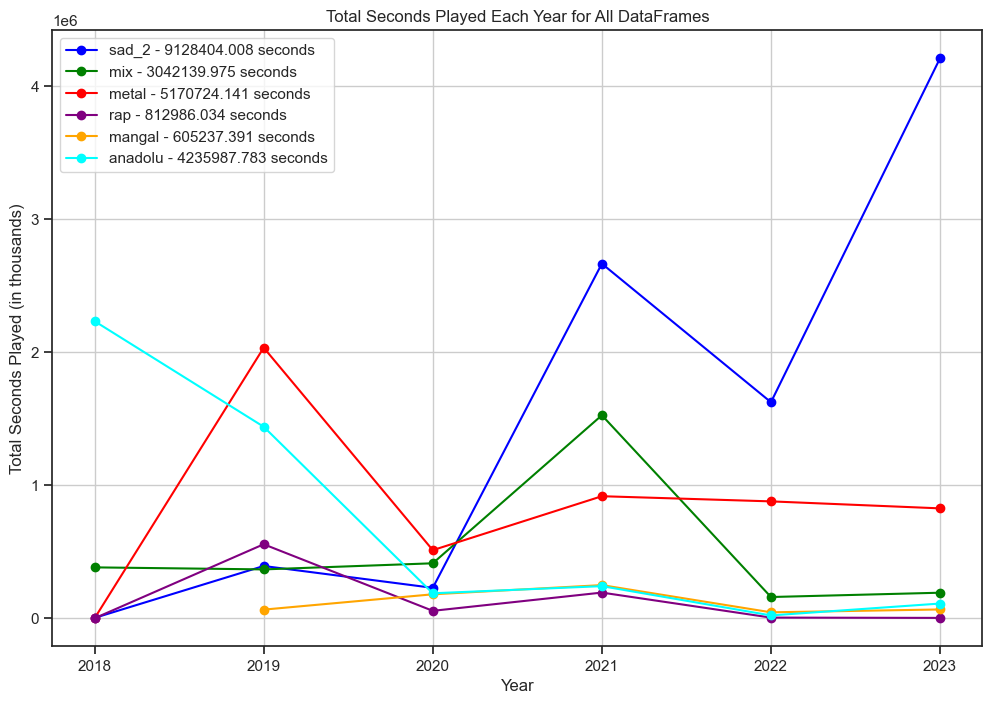

In [217]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Check if the number of DataFrames and colors match
if len(data_frames) != len(colors):
    raise ValueError("Number of DataFrames and colors must be the same.")

# Create a combined plot for all DataFrames
plt.figure(figsize=(12, 8))

# Iterate through each DataFrame in data_frames
for i, (file_name_3, df) in enumerate(data_frames.items()):
    total_ms_played[file_name_3] = 0  # Initialize total ms_played for the current DataFrame
    
    # Create a dictionary to store total ms_played for each year
    total_ms_per_year = {}
    
    # Iterate through each year in yearly_data_frames
    for year_key, yearly_df in yearly_data_frames.items():
        # Merge based on the condition: 'song' == 'master_metadata_track_name' and 'artist' == 'master_metadata_album_artist_name'
        merged_df = pd.merge(df, yearly_df, left_on=['Song', 'Artist'], right_on=['master_metadata_track_name', 'master_metadata_album_artist_name'], how='inner')
        
        # Check if there are matching records
        if not merged_df.empty:
            # Handle potential repetition of songs with different ms_played
            merged_df['ms_played'] = merged_df.groupby(['Song', 'Artist'])['ms_played'].transform('sum')
            
            # Accumulate the total ms_played for the current DataFrame
            total_ms_played[file_name_3] += merged_df['ms_played'].sum()

            # Extract the year from the year_key (e.g., 'year_2018' -> '2018')
            year = int(year_key.split('_')[1])
            
            # Store the total ms_played for the current year
            total_ms_per_year[year] = merged_df['ms_played'].sum()

    # Plotting for the current DataFrame along with the corresponding year
    plt.plot(list(total_ms_per_year.keys()), [ms / 1000 for ms in total_ms_per_year.values()], marker='o', label=f"{file_name_3} - {total_ms_played[file_name_3] / 1000} seconds", color=colors[i])

plt.title("Total Seconds Played Each Year for All DataFrames")
plt.xlabel("Year")
plt.ylabel("Total Seconds Played (in thousands)")
plt.legend()
plt.grid(True)
plt.show()

In [218]:
top2018 = pd.read_csv(r"C:\Users\ÇağrıArslantürk\Desktop\CS210\Top Hits of 2018.csv")
top2019 = pd.read_csv(r"C:\Users\ÇağrıArslantürk\Desktop\CS210\Top Hits of 2019.csv")
top2020 = pd.read_csv(r"C:\Users\ÇağrıArslantürk\Desktop\CS210\Top Hits of 2020.csv")
top2021 = pd.read_csv(r"C:\Users\ÇağrıArslantürk\Desktop\CS210\Top Hits of 2021.csv")
top2022 = pd.read_csv(r"C:\Users\ÇağrıArslantürk\Desktop\CS210\Top Hits of 2022.csv")
top2023 = pd.read_csv(r"C:\Users\ÇağrıArslantürk\Desktop\CS210\Top hits of 2023.csv")

<Figure size 1200x800 with 0 Axes>

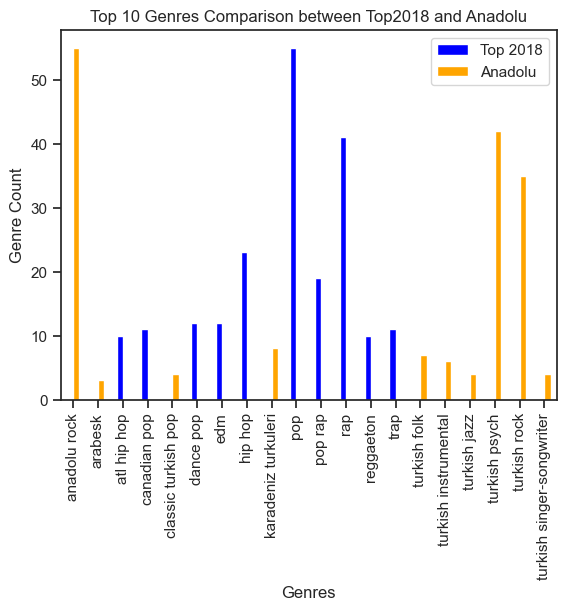

In [219]:
last_df_name = os.path.splitext(os.path.basename(csv_files[-1]))[0]
last_df = data_frames.get(last_df_name)

top2018_genres = top2018['Genres'].str.split(', ', expand=True).stack()
anadolu_genres = last_df['Genres'].str.split(', ', expand=True).stack()

top_n = 10  # You can adjust this value based on your preference

top2018_top_genres = top2018_genres.value_counts().nlargest(top_n)
anadolu_top_genres = anadolu_genres.value_counts().nlargest(top_n)

# Combine counts into a single DataFrame
genre_comparison = pd.DataFrame({
    'Top 2018': top2018_top_genres,
    'Anadolu': anadolu_top_genres
}).fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
genre_comparison.plot(kind='bar', color=['blue', 'orange'])
plt.title(f'Top {top_n} Genres Comparison between Top2018 and Anadolu')
plt.xlabel('Genres')
plt.ylabel('Genre Count')
plt.legend()
plt.show()

c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


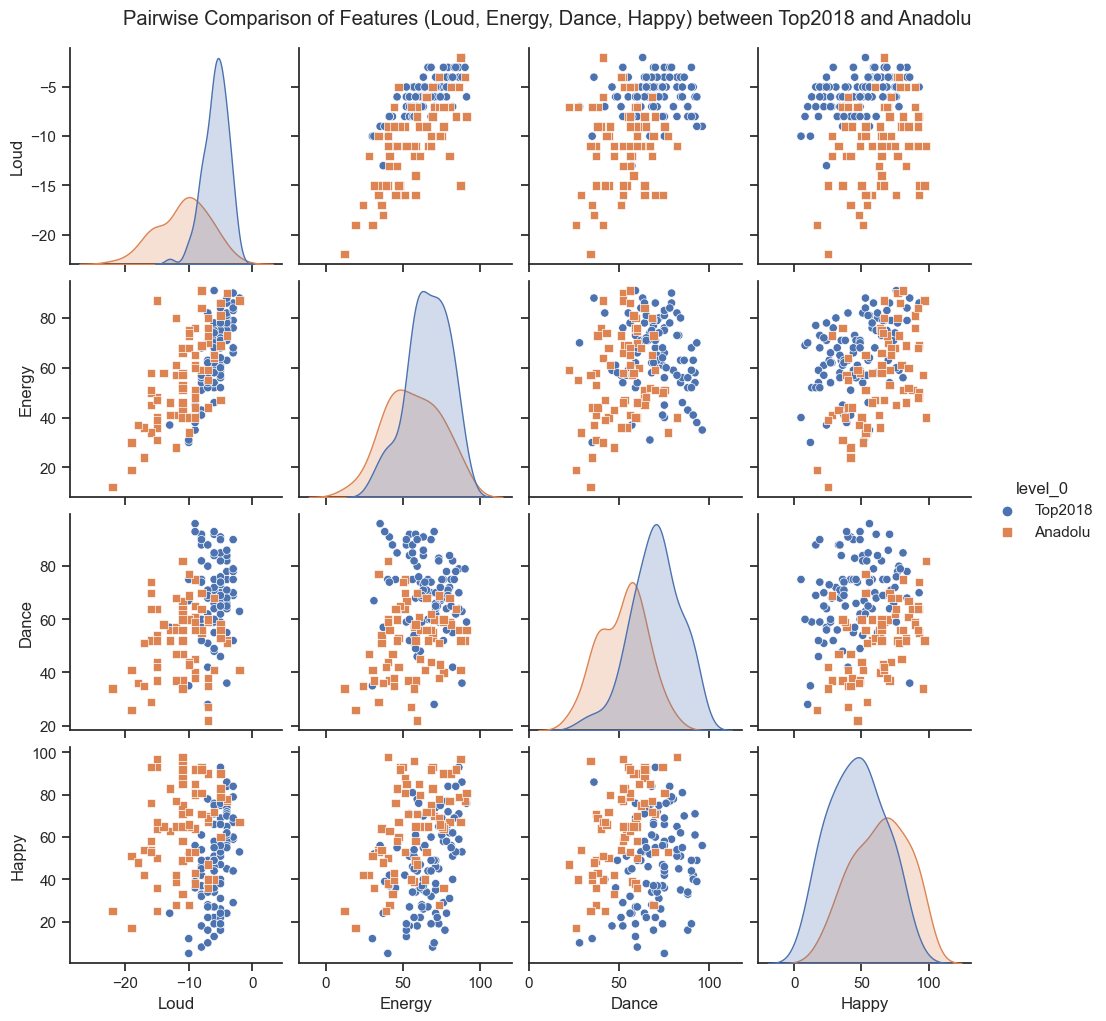

In [220]:
selected_features = ['Loud', 'Energy', 'Dance', 'Happy']

# Combine DataFrames into a single DataFrame
combined_df = pd.concat([top2018[selected_features], last_df[selected_features]], keys=['Top2018', 'Anadolu'])

# Create a pair plot for the selected features
sns.set(style="ticks")
sns.pairplot(combined_df.reset_index(level=0), hue='level_0', markers=['o', 's'])
plt.suptitle('Pairwise Comparison of Features (Loud, Energy, Dance, Happy) between Top2018 and Anadolu', y=1.02)
plt.show()

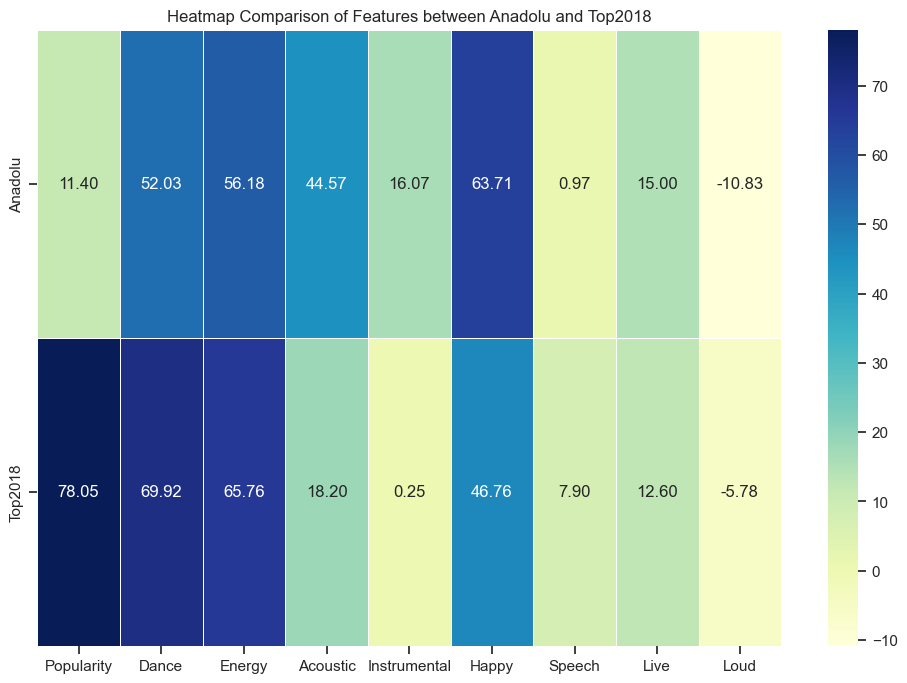

In [221]:
selected_features_1 = ['Popularity', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud']

# Creating a DataFrame with selected features for both 'anadolu' and 'top2018'
heatmap_data = pd.concat([last_df[selected_features_1], top2018[selected_features_1]], keys=['Anadolu', 'Top2018'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.groupby(level=0).mean(), cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap Comparison of Features between Anadolu and Top2018')
plt.show()

<Figure size 1200x800 with 0 Axes>

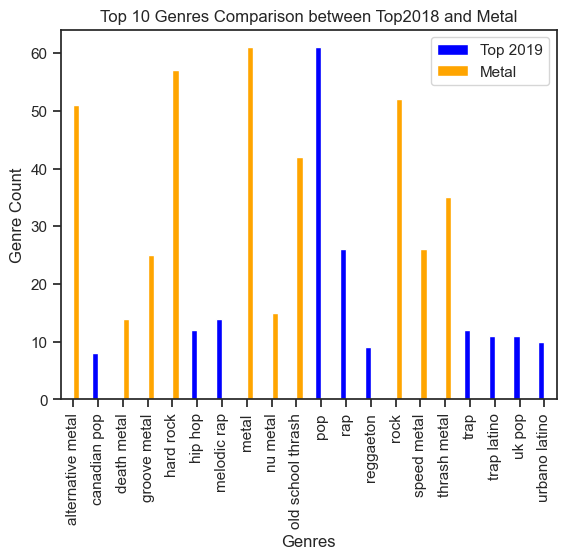

In [222]:
target_df = os.path.splitext(os.path.basename(csv_files[2]))[0]
metal = data_frames.get(target_df)

top2019_genres = top2019['Genres'].str.split(', ', expand=True).stack()
metal_genres = metal['Genres'].str.split(', ', expand=True).stack()

top_n = 10  # You can adjust this value based on your preference

top2019_top_genres = top2019_genres.value_counts().nlargest(top_n)
metal_top_genres = metal_genres.value_counts().nlargest(top_n)

# Combine counts into a single DataFrame
genre_comparison_1 = pd.DataFrame({
    'Top 2019': top2019_top_genres,
    'Metal': metal_top_genres
}).fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
genre_comparison_1.plot(kind='bar', color=['blue', 'orange'])
plt.title(f'Top {top_n} Genres Comparison between Top2018 and Metal')
plt.xlabel('Genres')
plt.ylabel('Genre Count')
plt.legend()
plt.show()

c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


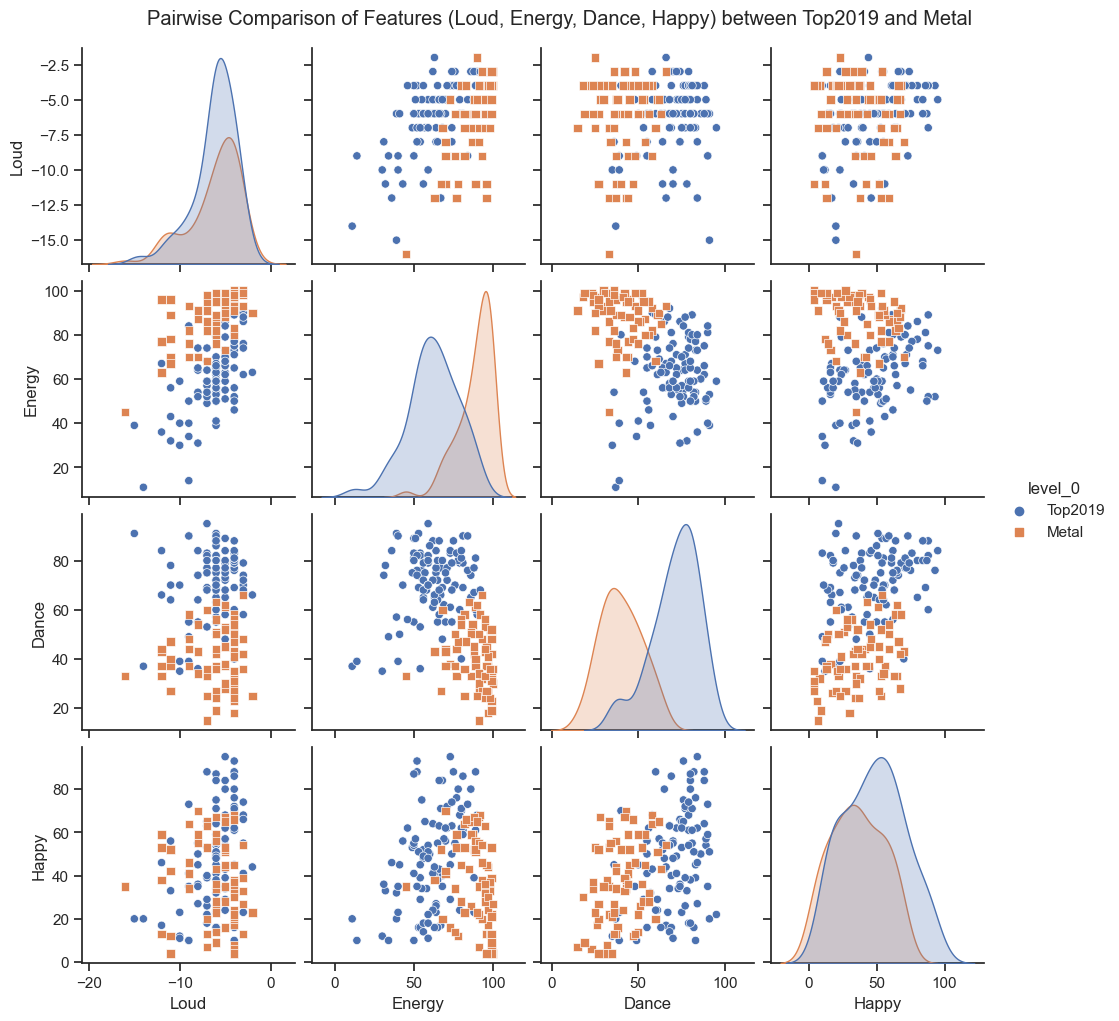

In [223]:
selected_features_2 = ['Loud', 'Energy', 'Dance', 'Happy']

# Combine DataFrames into a single DataFrame
combined_df_2 = pd.concat([top2019[selected_features_2], metal[selected_features_2]], keys=['Top2019', 'Metal'])

# Create a pair plot for the selected features
sns.set(style="ticks")
sns.pairplot(combined_df_2.reset_index(level=0), hue='level_0', markers=['o', 's'])
plt.suptitle('Pairwise Comparison of Features (Loud, Energy, Dance, Happy) between Top2019 and Metal', y=1.02)
plt.show()

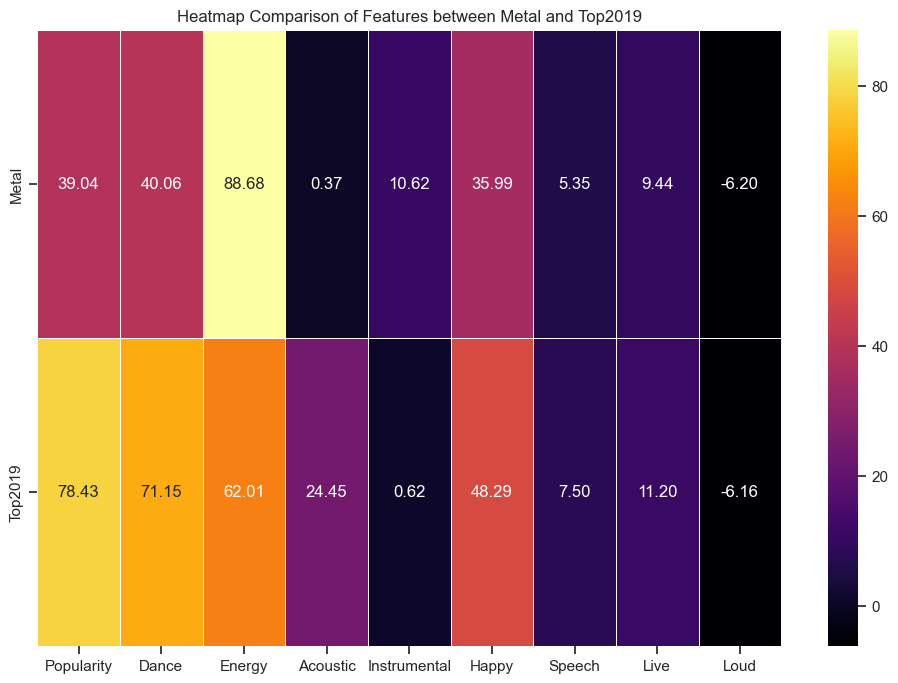

In [224]:
selected_features_3 = ['Popularity', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud']

# Creating a DataFrame with selected features for both 'anadolu' and 'top2018'
heatmap_data_3 = pd.concat([metal[selected_features_3], top2019[selected_features_3]], keys=['Metal', 'Top2019'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_3.groupby(level=0).mean(), cmap='inferno', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap Comparison of Features between Metal and Top2019')
plt.show()

<Figure size 1200x800 with 0 Axes>

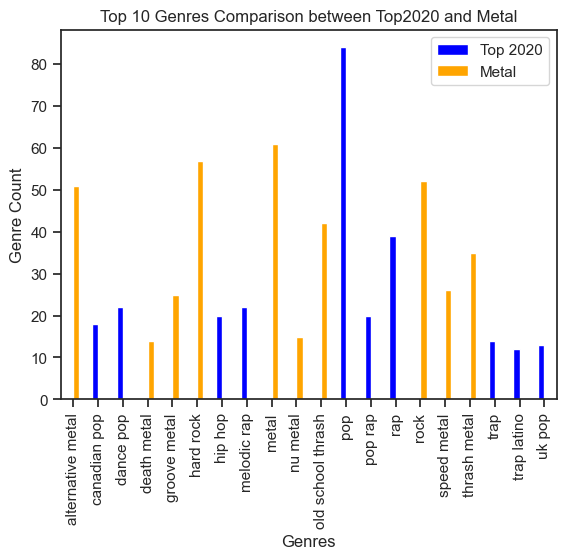

In [225]:
target_df_2 = os.path.splitext(os.path.basename(csv_files[2]))[0]
metal_2 = data_frames.get(target_df_2)

top2020_genres = top2020['Genres'].str.split(', ', expand=True).stack()
metal_genres_2 = metal_2['Genres'].str.split(', ', expand=True).stack()

top_n = 10  # You can adjust this value based on your preference

top2020_top_genres = top2020_genres.value_counts().nlargest(top_n)
metal_top_genres_1 = metal_genres_2.value_counts().nlargest(top_n)

# Combine counts into a single DataFrame
genre_comparison_2 = pd.DataFrame({
    'Top 2020': top2020_top_genres,
    'Metal': metal_top_genres_1
}).fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
genre_comparison_2.plot(kind='bar', color=['blue', 'orange'])
plt.title(f'Top {top_n} Genres Comparison between Top2020 and Metal')
plt.xlabel('Genres')
plt.ylabel('Genre Count')
plt.legend()
plt.show()

c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


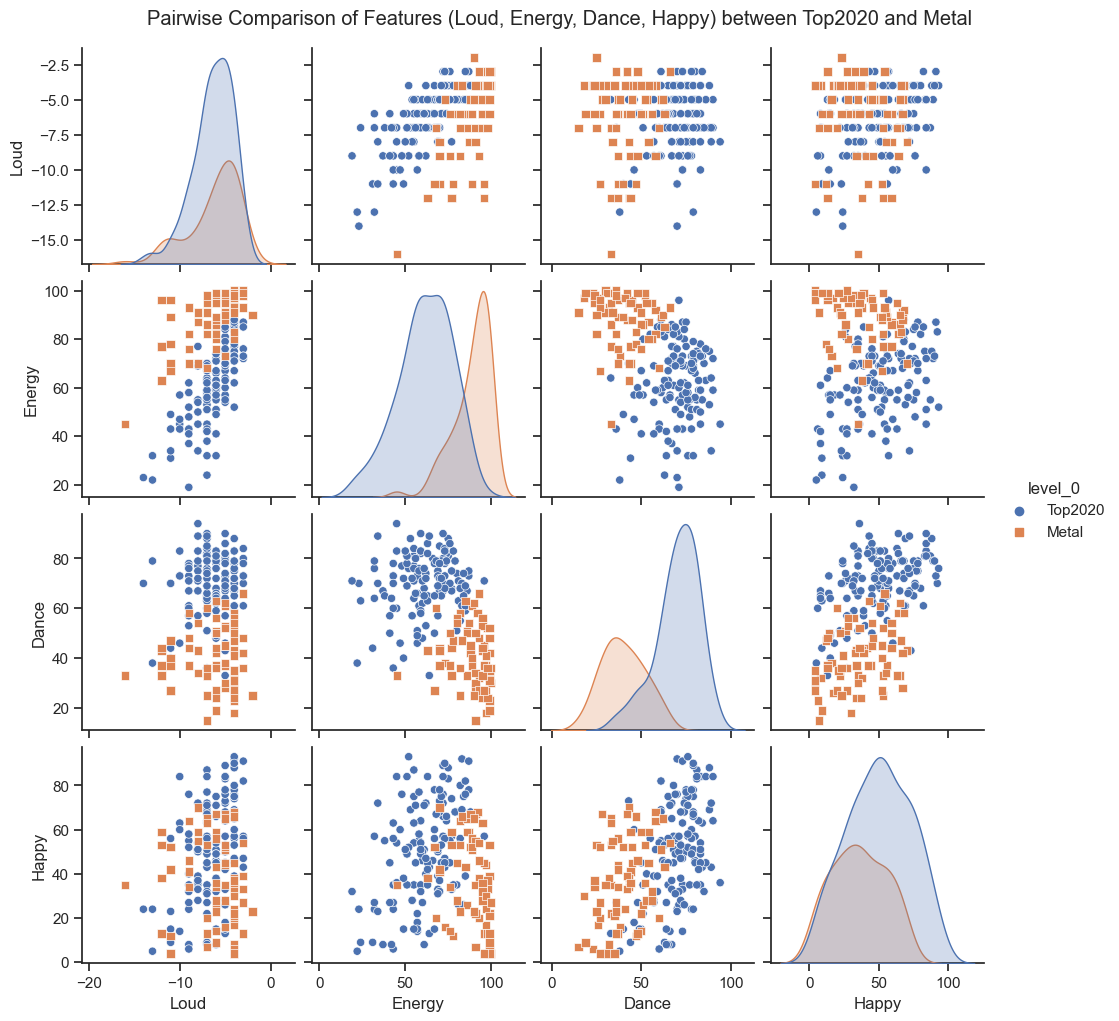

In [226]:
selected_features_4 = ['Loud', 'Energy', 'Dance', 'Happy']

# Combine DataFrames into a single DataFrame
combined_df_3 = pd.concat([top2020[selected_features_4], metal_2[selected_features_4]], keys=['Top2020', 'Metal'])

# Create a pair plot for the selected features
sns.set(style="ticks")
sns.pairplot(combined_df_3.reset_index(level=0), hue='level_0', markers=['o', 's'])
plt.suptitle('Pairwise Comparison of Features (Loud, Energy, Dance, Happy) between Top2020 and Metal', y=1.02)
plt.show()

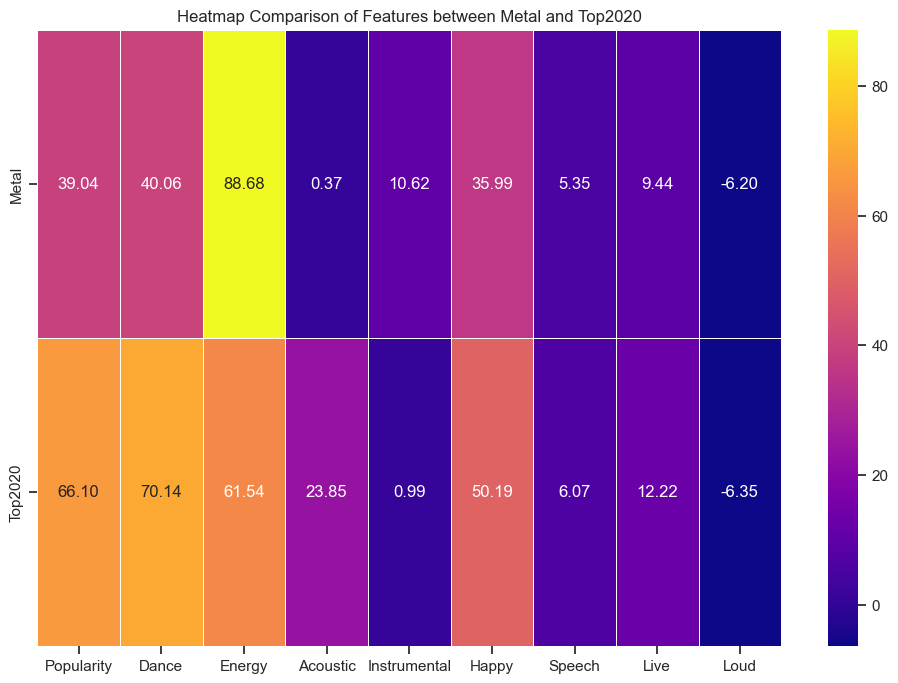

In [227]:
selected_features_5 = ['Popularity', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud']

# Creating a DataFrame with selected features for both 'anadolu' and 'top2018'
heatmap_data_3 = pd.concat([metal_2[selected_features_5], top2020[selected_features_5]], keys=['Metal', 'Top2020'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_3.groupby(level=0).mean(), cmap='plasma', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap Comparison of Features between Metal and Top2020')
plt.show()

<Figure size 1200x800 with 0 Axes>

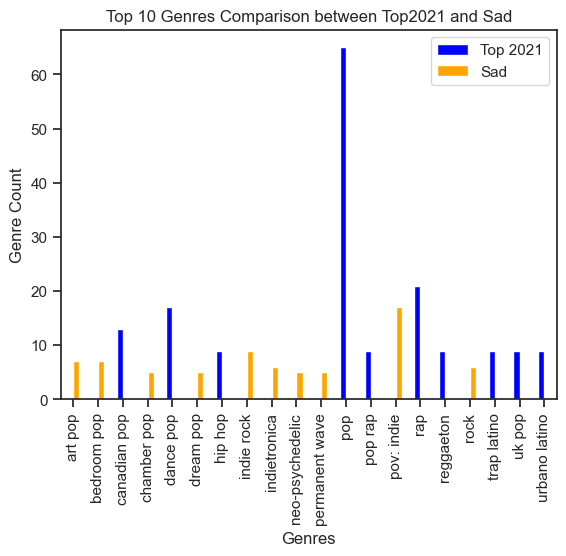

In [244]:
target_df_5 = os.path.splitext(os.path.basename(csv_files[0]))[0]
sad = data_frames.get(target_df_5)

top2021_genres = top2021['Genres'].str.split(', ', expand=True).stack()
sad_genres = sad['Genres'].str.split(', ', expand=True).stack()

top_n = 10  # You can adjust this value based on your preference

top2021_top_genres = top2021_genres.value_counts().nlargest(top_n)
sad_top_genres = sad_genres.value_counts().nlargest(top_n)

# Combine counts into a single DataFrame
genre_comparison_3 = pd.DataFrame({
    'Top 2021': top2021_top_genres,
    'Sad': sad_top_genres
}).fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
genre_comparison_3.plot(kind='bar', color=['blue', 'orange'])
plt.title(f'Top {top_n} Genres Comparison between Top2021 and Sad')
plt.xlabel('Genres')
plt.ylabel('Genre Count')
plt.legend()
plt.show()

c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


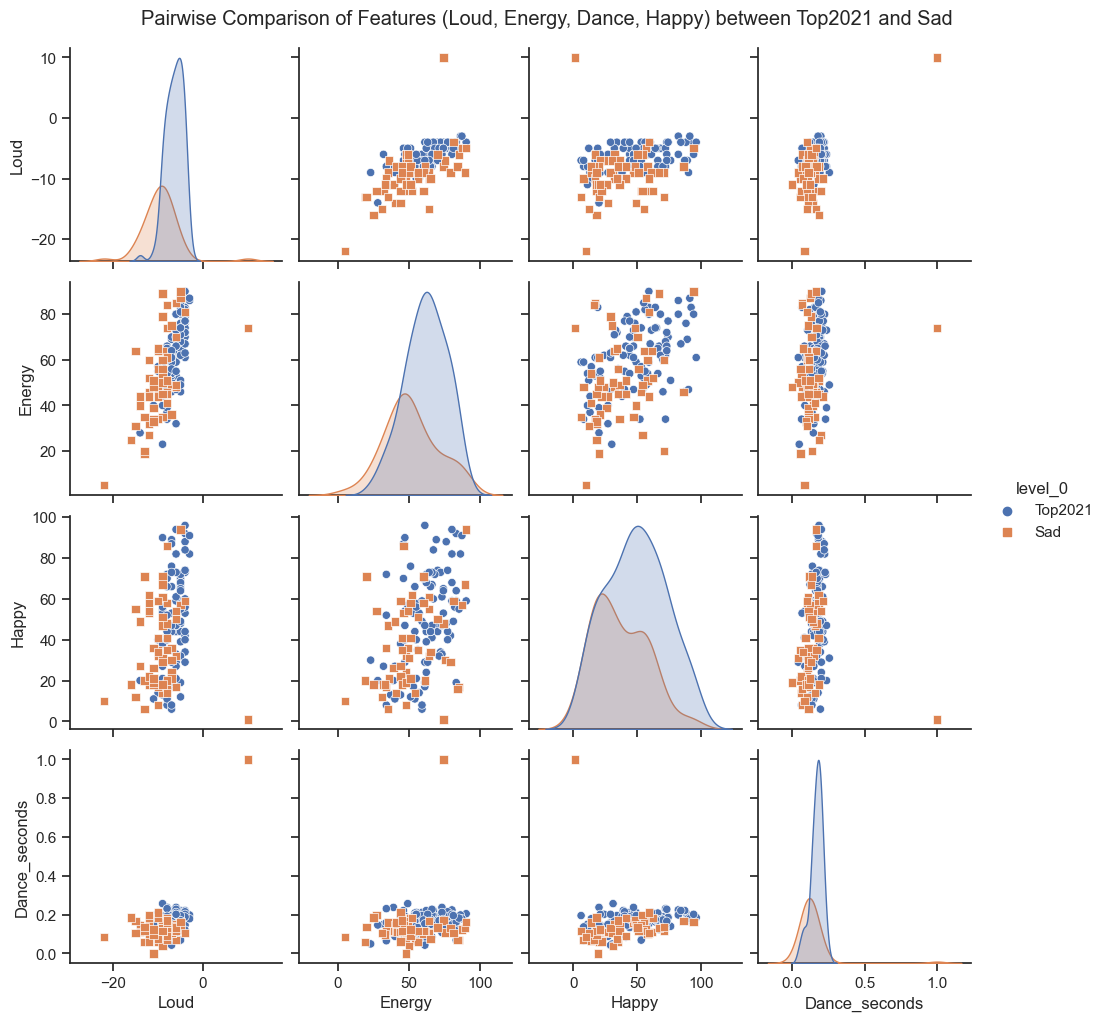

In [231]:
selected_features_6 = ['Loud', 'Energy', 'Dance', 'Happy']

# Combine DataFrames into a single DataFrame
combined_df_5 = pd.concat([top2021[selected_features_6], sad[selected_features_6]], keys=['Top2021', 'Sad'])

# Convert 'Dance' feature to total seconds
combined_df_5['Dance_seconds'] = combined_df_5['Dance'].apply(lambda x: sum(int(i) * 60**index for index, i in enumerate(reversed(str(x).split(':')))) if ':' in str(x) else x)

# Convert the 'Dance_seconds' column to numeric (float)
combined_df_5['Dance_seconds'] = pd.to_numeric(combined_df_5['Dance_seconds'], errors='coerce')

# Normalize the 'Dance_seconds' feature
scaler = MinMaxScaler()
combined_df_5[['Dance_seconds']] = scaler.fit_transform(combined_df_5[['Dance_seconds']])

# Create a pair plot for the selected features
sns.set(style="ticks")
sns.pairplot(combined_df_5.reset_index(level=0), hue='level_0', markers=['o', 's'])
plt.suptitle('Pairwise Comparison of Features (Loud, Energy, Dance, Happy) between Top2021 and Sad', y=1.02)
plt.show()

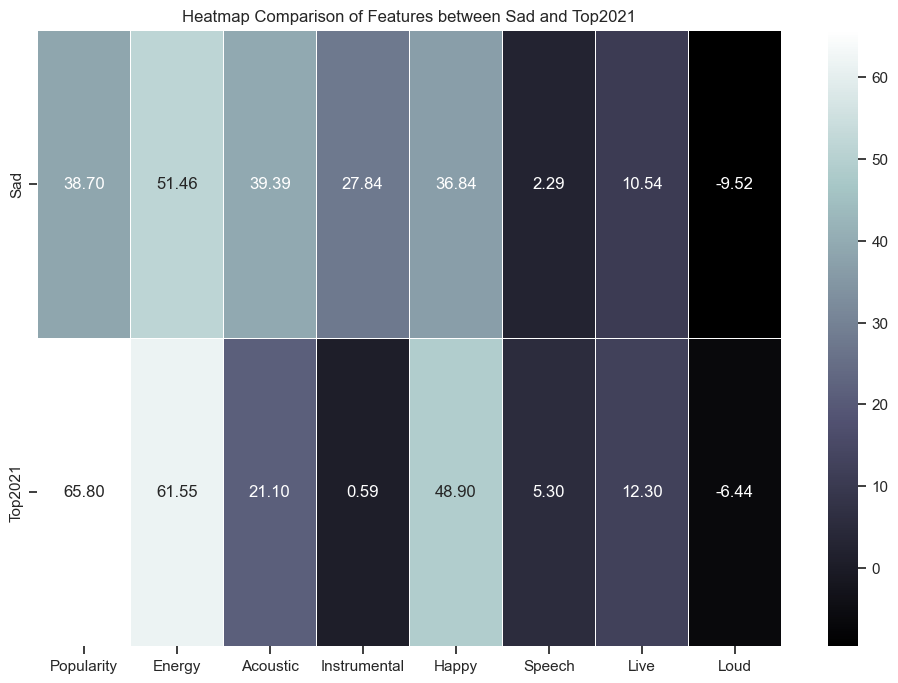

In [243]:
selected_features_7 = ['Popularity', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud']

# Creating a DataFrame with selected features for both 'anadolu' and 'top2018'
heatmap_data_4 = pd.concat([sad[selected_features_7], top2021[selected_features_7]], keys=['Sad', 'Top2021'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_4.groupby(level=0).mean(), cmap='bone', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap Comparison of Features between Sad and Top2021')
plt.show()

<Figure size 1200x800 with 0 Axes>

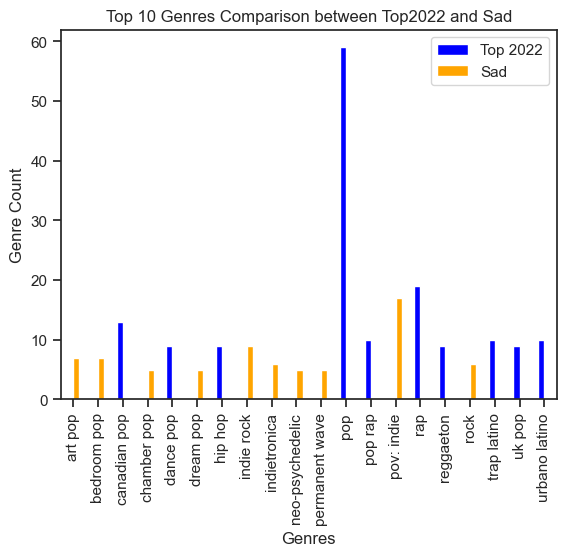

In [245]:
target_df_5 = os.path.splitext(os.path.basename(csv_files[0]))[0]
sad = data_frames.get(target_df_5)

top2022_genres = top2022['Genres'].str.split(', ', expand=True).stack()
sad_genres = sad['Genres'].str.split(', ', expand=True).stack()

top_n = 10  # You can adjust this value based on your preference

top2022_top_genres = top2022_genres.value_counts().nlargest(top_n)
sad_top_genres = sad_genres.value_counts().nlargest(top_n)

# Combine counts into a single DataFrame
genre_comparison_4 = pd.DataFrame({
    'Top 2022': top2022_top_genres,
    'Sad': sad_top_genres
}).fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
genre_comparison_4.plot(kind='bar', color=['blue', 'orange'])
plt.title(f'Top {top_n} Genres Comparison between Top2022 and Sad')
plt.xlabel('Genres')
plt.ylabel('Genre Count')
plt.legend()
plt.show()

c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


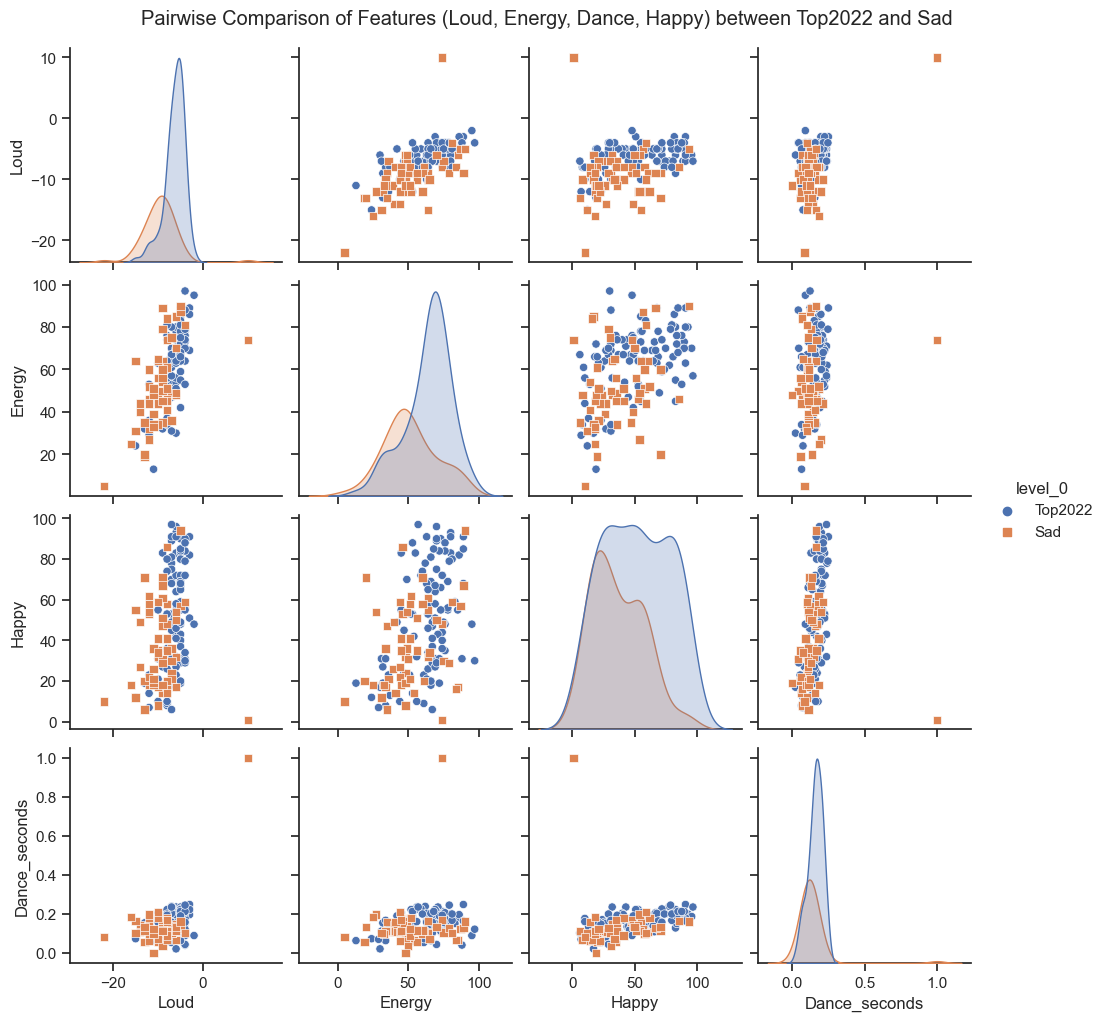

In [246]:
selected_features_8 = ['Loud', 'Energy', 'Dance', 'Happy']

# Combine DataFrames into a single DataFrame
combined_df_6 = pd.concat([top2022[selected_features_8], sad[selected_features_8]], keys=['Top2022', 'Sad'])

# Convert 'Dance' feature to total seconds
combined_df_6['Dance_seconds'] = combined_df_6['Dance'].apply(lambda x: sum(int(i) * 60**index for index, i in enumerate(reversed(str(x).split(':')))) if ':' in str(x) else x)

# Convert the 'Dance_seconds' column to numeric (float)
combined_df_6['Dance_seconds'] = pd.to_numeric(combined_df_6['Dance_seconds'], errors='coerce')

# Normalize the 'Dance_seconds' feature
scaler = MinMaxScaler()
combined_df_6[['Dance_seconds']] = scaler.fit_transform(combined_df_6[['Dance_seconds']])

# Create a pair plot for the selected features
sns.set(style="ticks")
sns.pairplot(combined_df_6.reset_index(level=0), hue='level_0', markers=['o', 's'])
plt.suptitle('Pairwise Comparison of Features (Loud, Energy, Dance, Happy) between Top2022 and Sad', y=1.02)
plt.show()

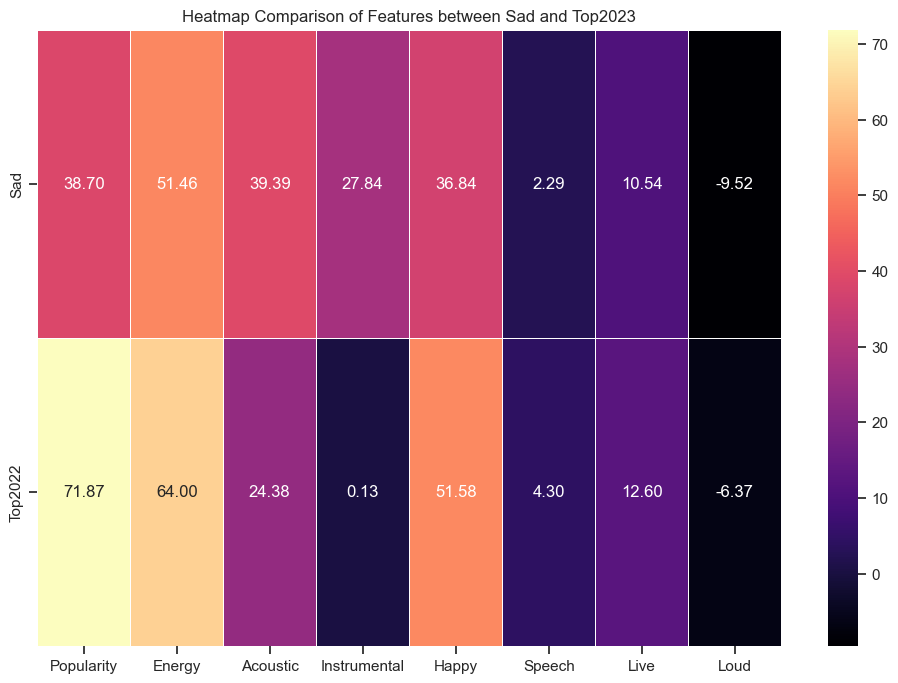

In [250]:
selected_features_9 = ['Popularity', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud']

# Creating a DataFrame with selected features for both 'anadolu' and 'top2018'
heatmap_data_6 = pd.concat([sad[selected_features_9], top2022[selected_features_9]], keys=['Sad', 'Top2022'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_6.groupby(level=0).mean(), cmap='magma', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap Comparison of Features between Sad and Top2023')
plt.show()

<Figure size 1200x800 with 0 Axes>

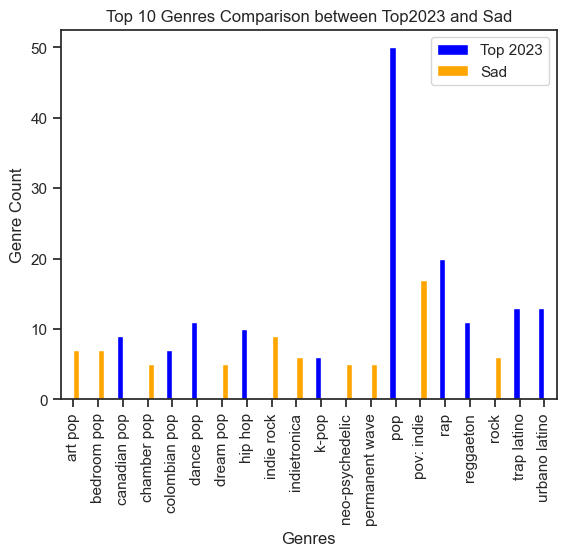

In [248]:
target_df_6 = os.path.splitext(os.path.basename(csv_files[0]))[0]
sad = data_frames.get(target_df_6)

top2023_genres = top2023['Genres'].str.split(', ', expand=True).stack()
sad_genres = sad['Genres'].str.split(', ', expand=True).stack()

top_n = 10  # You can adjust this value based on your preference

top2023_top_genres = top2023_genres.value_counts().nlargest(top_n)
sad_top_genres = sad_genres.value_counts().nlargest(top_n)

# Combine counts into a single DataFrame
genre_comparison_5 = pd.DataFrame({
    'Top 2023': top2023_top_genres,
    'Sad': sad_top_genres
}).fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
genre_comparison_5.plot(kind='bar', color=['blue', 'orange'])
plt.title(f'Top {top_n} Genres Comparison between Top2023 and Sad')
plt.xlabel('Genres')
plt.ylabel('Genre Count')
plt.legend()
plt.show()

c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


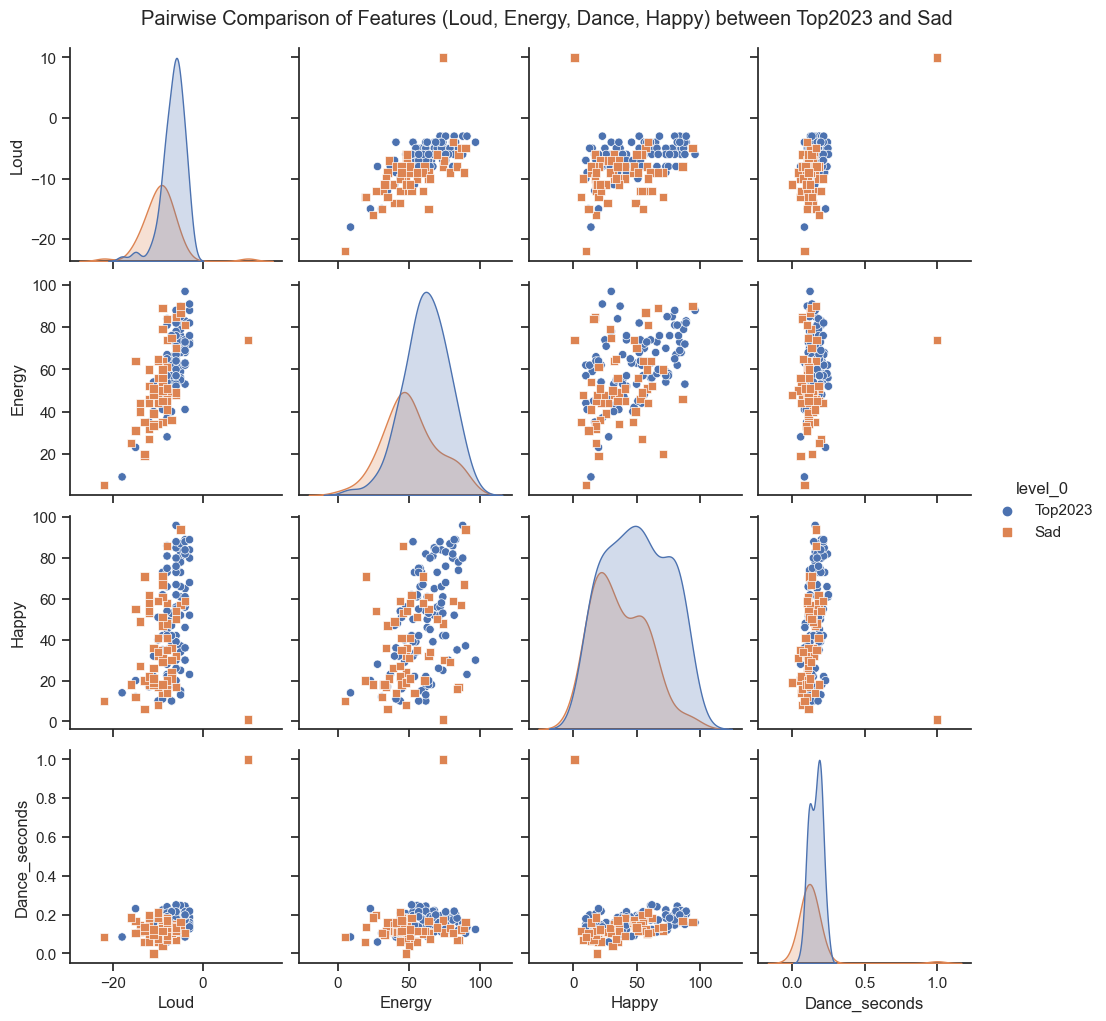

In [249]:
selected_features_11 = ['Loud', 'Energy', 'Dance', 'Happy']

# Combine DataFrames into a single DataFrame
combined_df_7 = pd.concat([top2023[selected_features_11], sad[selected_features_11]], keys=['Top2023', 'Sad'])

# Convert 'Dance' feature to total seconds
combined_df_7['Dance_seconds'] = combined_df_7['Dance'].apply(lambda x: sum(int(i) * 60**index for index, i in enumerate(reversed(str(x).split(':')))) if ':' in str(x) else x)

# Convert the 'Dance_seconds' column to numeric (float)
combined_df_7['Dance_seconds'] = pd.to_numeric(combined_df_7['Dance_seconds'], errors='coerce')

# Normalize the 'Dance_seconds' feature
scaler = MinMaxScaler()
combined_df_7[['Dance_seconds']] = scaler.fit_transform(combined_df_7[['Dance_seconds']])

# Create a pair plot for the selected features
sns.set(style="ticks")
sns.pairplot(combined_df_7.reset_index(level=0), hue='level_0', markers=['o', 's'])
plt.suptitle('Pairwise Comparison of Features (Loud, Energy, Dance, Happy) between Top2023 and Sad', y=1.02)
plt.show()

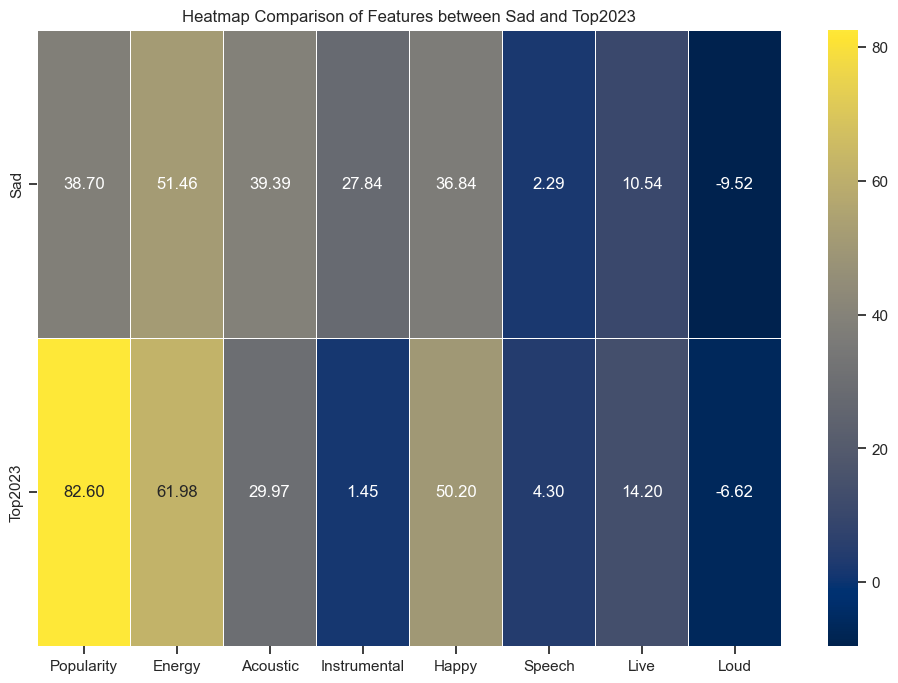

In [252]:
selected_features_12 = ['Popularity', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud']

# Creating a DataFrame with selected features for both 'anadolu' and 'top2018'
heatmap_data_7 = pd.concat([sad[selected_features_12], top2023[selected_features_12]], keys=['Sad', 'Top2023'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_7.groupby(level=0).mean(), cmap='cividis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap Comparison of Features between Sad and Top2023')
plt.show()